<a href="https://colab.research.google.com/github/senhajiboutayna/Detection-of-Phishing-Attacks-with-AI-and-NLP/blob/main/models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:25:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 0.9957
XGBoost - ROC AUC: 0.9998


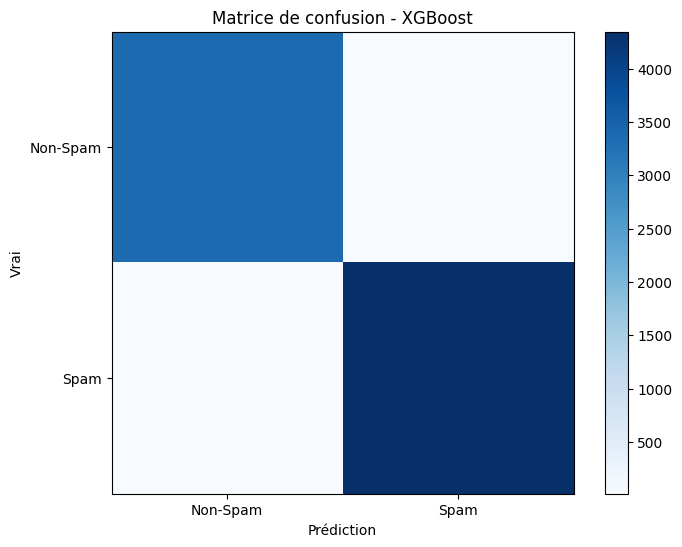

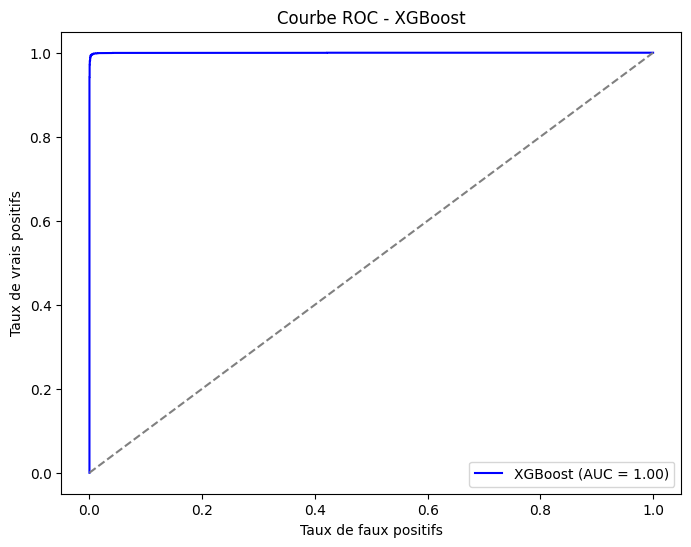

SVM - Accuracy: 0.9938
SVM - ROC AUC: 0.9985


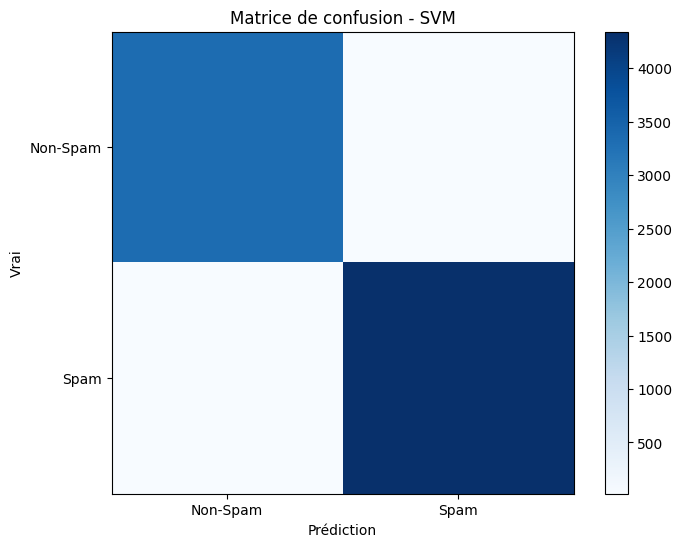

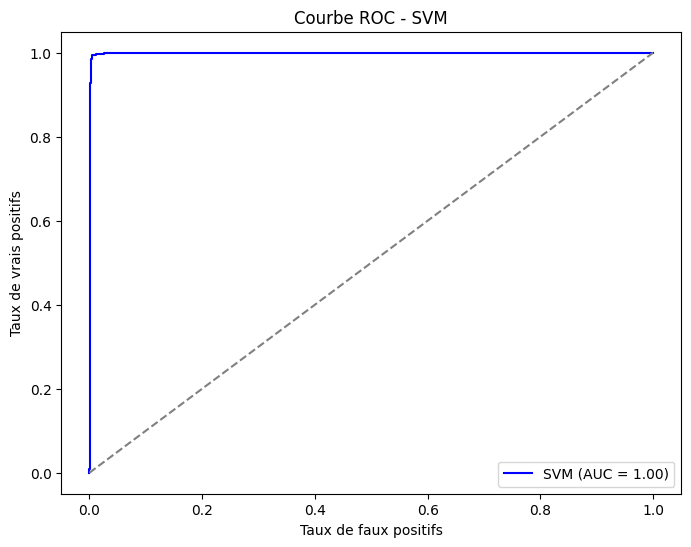

Random Forest - Accuracy: 0.9741
Random Forest - ROC AUC: 0.9979


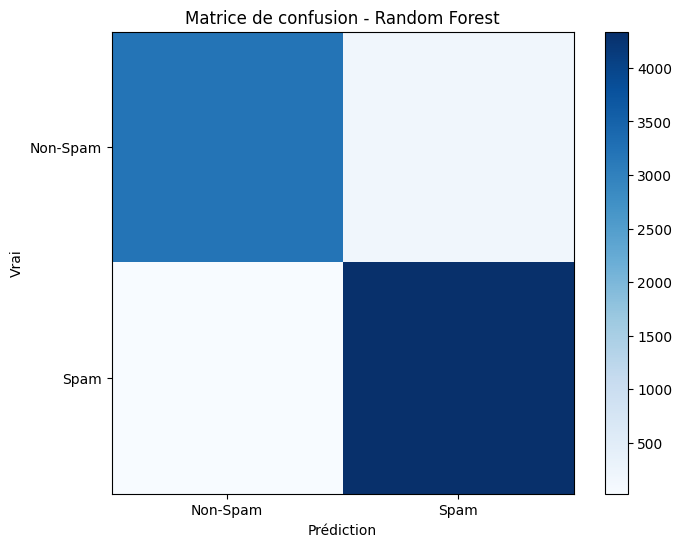

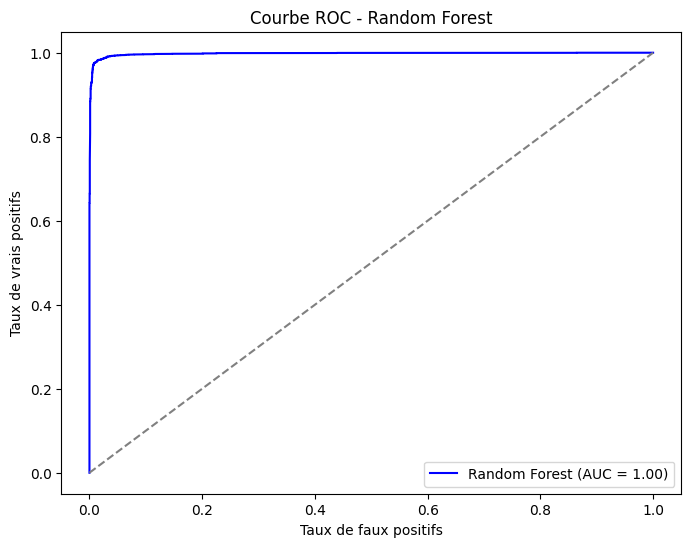

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


file_path = '/content/cleaned_phishing_data.csv'
data = pd.read_csv(file_path)


data_clean = data.dropna(subset=['label'])


X = data_clean.drop(columns=['label'])
y = data_clean['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------------ XGBoost Model ------------------------------
xgb_model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False,
                              eval_metric='logloss', n_estimators=100, max_depth=6)
xgb_model.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_model.predict(X_test_scaled)
y_pred_proba_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

print(f"XGBoost - Accuracy: {accuracy_xgb:.4f}")
print(f"XGBoost - ROC AUC: {roc_auc_xgb:.4f}")


cm = confusion_matrix(y_test, y_pred_xgb)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_xgb)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matrice de confusion - XGBoost")
plt.colorbar()
plt.ylabel('Vrai')
plt.xlabel('Prédiction')
plt.xticks([0, 1], ['Non-Spam', 'Spam'])
plt.yticks([0, 1], ['Non-Spam', 'Spam'])
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC - XGBoost')
plt.legend(loc="lower right")
plt.show()

# ------------------------------ SVM Model ------------------------------
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)
y_pred_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

accuracy_svm = accuracy_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_proba_svm)

print(f"SVM - Accuracy: {accuracy_svm:.4f}")
print(f"SVM - ROC AUC: {roc_auc_svm:.4f}")


cm_svm = confusion_matrix(y_test, y_pred_svm)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)

plt.figure(figsize=(8, 6))
plt.imshow(cm_svm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matrice de confusion - SVM")
plt.colorbar()
plt.ylabel('Vrai')
plt.xlabel('Prédiction')
plt.xticks([0, 1], ['Non-Spam', 'Spam'])
plt.yticks([0, 1], ['Non-Spam', 'Spam'])
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC - SVM')
plt.legend(loc="lower right")
plt.show()

# ------------------------------ Random Forest Model ------------------------------
rf_model = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print(f"Random Forest - Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest - ROC AUC: {roc_auc_rf:.4f}")

cm_rf = confusion_matrix(y_test, y_pred_rf)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)

plt.figure(figsize=(8, 6))
plt.imshow(cm_rf, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matrice de confusion - Random Forest")
plt.colorbar()
plt.ylabel('Vrai')
plt.xlabel('Prédiction')
plt.xticks([0, 1], ['Non-Spam', 'Spam'])
plt.yticks([0, 1], ['Non-Spam', 'Spam'])
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC - Random Forest')
plt.legend(loc="lower right")
plt.show()


In [ ]:
models = ['XGBoost', 'SVM', 'Random Forest']
accuracies = [accuracy_xgb, accuracy_svm, accuracy_rf]
roc_aucs = [roc_auc_xgb, roc_auc_svm, roc_auc_rf]


results_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'ROC AUC': roc_aucs
})

print(results_df)

           Model  Accuracy   ROC AUC
0        XGBoost  0.995731  0.999794
1            SVM  0.993791  0.998523
2  Random Forest  0.974130  0.997868


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:47:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Stacking - Accuracy: 0.9960
Stacking - ROC AUC: 0.9996


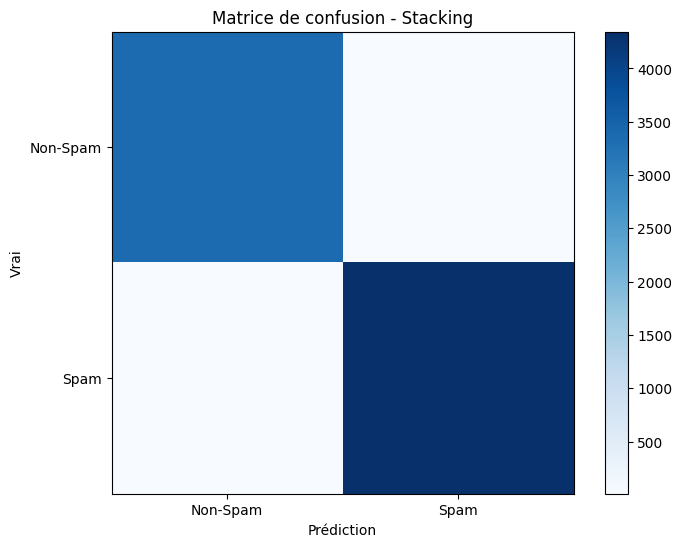

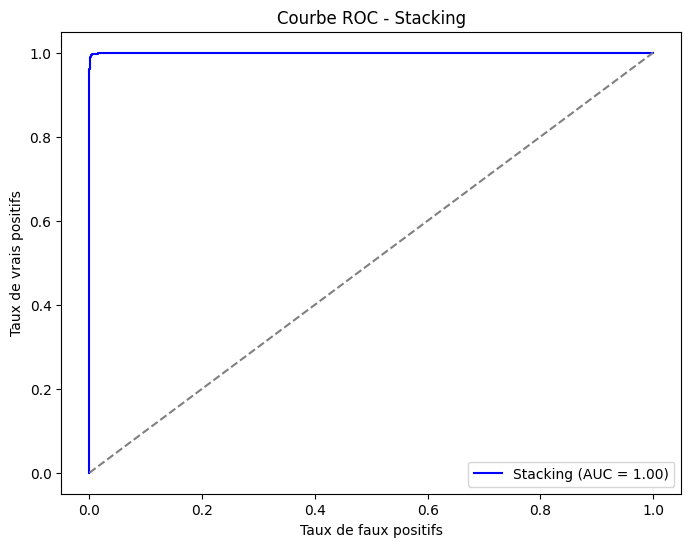

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier


file_path = '/content/cleaned_phishing_data.csv'
data = pd.read_csv(file_path)


X = data.drop(columns=['label'])
y = data['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------------ Modèles de base ------------------------------


xgb_model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False,
                              eval_metric='logloss', n_estimators=100, max_depth=6)


svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)  # 'rbf' est le noyau radial


rf_model = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)


xgb_model.fit(X_train_scaled, y_train)
svm_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)

# ------------------------------ Création de l'ensemble de features pour le stacking ------------------------------


y_pred_xgb_train = xgb_model.predict_proba(X_train_scaled)[:, 1]
y_pred_svm_train = svm_model.predict_proba(X_train_scaled)[:, 1]
y_pred_rf_train = rf_model.predict_proba(X_train_scaled)[:, 1]

X_train_stack = np.column_stack((y_pred_xgb_train, y_pred_svm_train, y_pred_rf_train))

meta_model = LogisticRegression()
meta_model.fit(X_train_stack, y_train)

# ------------------------------ Test du modèle de stacking ------------------------------


y_pred_xgb_test = xgb_model.predict_proba(X_test_scaled)[:, 1]
y_pred_svm_test = svm_model.predict_proba(X_test_scaled)[:, 1]
y_pred_rf_test = rf_model.predict_proba(X_test_scaled)[:, 1]

X_test_stack = np.column_stack((y_pred_xgb_test, y_pred_svm_test, y_pred_rf_test))


y_pred_stack = meta_model.predict(X_test_stack)
y_pred_proba_stack = meta_model.predict_proba(X_test_stack)[:, 1]


accuracy_stack = accuracy_score(y_test, y_pred_stack)
roc_auc_stack = roc_auc_score(y_test, y_pred_proba_stack)

print(f"Stacking - Accuracy: {accuracy_stack:.4f}")
print(f"Stacking - ROC AUC: {roc_auc_stack:.4f}")

# ------------------------------ Matrice de confusion et courbe ROC ------------------------------
cm_stack = confusion_matrix(y_test, y_pred_stack)
fpr_stack, tpr_stack, _ = roc_curve(y_test, y_pred_proba_stack)


plt.figure(figsize=(8, 6))
plt.imshow(cm_stack, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matrice de confusion - Stacking")
plt.colorbar()
plt.ylabel('Vrai')
plt.xlabel('Prédiction')
plt.xticks([0, 1], ['Non-Spam', 'Spam'])
plt.yticks([0, 1], ['Non-Spam', 'Spam'])
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(fpr_stack, tpr_stack, color='blue', label=f'Stacking (AUC = {roc_auc_stack:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC - Stacking')
plt.legend(loc="lower right")
plt.show()
